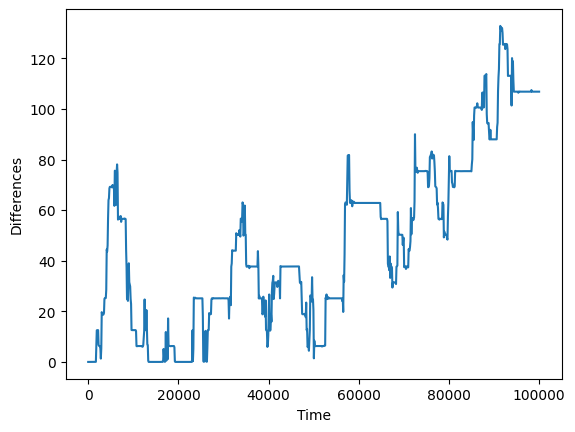

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# set parameters
ga  = 0.2
Gam = 1.2
Om  = 0.5
c   = 0.79
tend = 100000

# this is just the two coupled oscillators (1).  They are already made a little different
# (their gamma's differ by 1e-10).  To get the Lyapunov exponent of the single system, 
# you will have to add the single system, and its linearized version (2). To get the 
# Lyapunov exponent of the difference system, you will have to add the linearized difference
# system.  Just arrange it as in the assignment.
def couplo_ode(t, y):
    dydt = [y[1], 
            -(ga      )*y[1] - np.sin(y[0]) + Gam*np.cos(Om*t) + c*(np.sin(y[0]) - np.sin(y[2]))/2,
            y[3],
            -(ga+1e-10)*y[3] - np.sin(y[2]) + Gam*np.cos(Om*t) + c*(np.sin(y[2]) - np.sin(y[0]))/2]
    return dydt

# solve_ivp runs all the way to tend.  To get statistics of  finite-time 
# Lyapunov exponents you have to cut the interval [0 tend] in
# pieces.  For example 1e4 pieces of length 1e3.  After each piece, you
# set the initial condition to the last value.  From the normalization
# of the linearized vectors, you get the \Lambda_T.


# sol = solve_ivp(couplo_ode, [0, tend], [0.1, 0.1, 0.1, 0.1], method='RK45', t_eval=np.linspace(0, tend, 1000))

# Add solver options
options = {
    'method': 'RK45',
    'rtol': 1e-3,  # Relative tolerance
    'atol': 1e-6,  # Absolute tolerance
    't_eval': np.linspace(0, tend, 1000)  # Time points at which to save the solution
}

sol = solve_ivp(couplo_ode, [0, tend], [0.1, 0.1, 0.1, 0.1], **options)



# solve_ivp internally does as many time steps it needs, times are in t, solution in y.  'end' is the index of
# the final time, so y(end,:) is the final result.

# just doing the differences for the histograms.
dif = np.sqrt((sol.y[0, :] - sol.y[2, :])**2 + (sol.y[1, :] - sol.y[3, :])**2)



# Plot the differences
plt.figure()
plt.plot(sol.t, dif)
plt.xlabel('Time')
plt.ylabel('Differences')
plt.show()